In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#loading the dataset
dataset = pd.read_csv ( "/content/drive/MyDrive/Mall_Customers.csv" )
print ( dataset.shape )

(200, 5)


In [41]:
print ( dataset.columns )
dataset.columns = [ "CustomerID" , "Gender" , "Age" , "AnnualIncome" , "SpendingScore" ]
dataset.drop ( columns = [ "CustomerID" ] , inplace = True )

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7c3c2b40d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7c3c2b4b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7c3c2b0a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7c3c2ba650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7c3c2bab90>],
 'means': []}

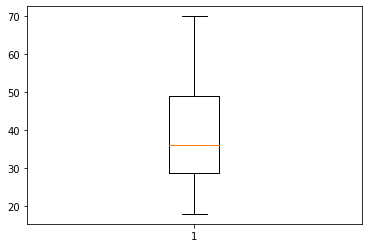

In [42]:
#univariate Analysis
plt.boxplot ( dataset [ "Age" ] )

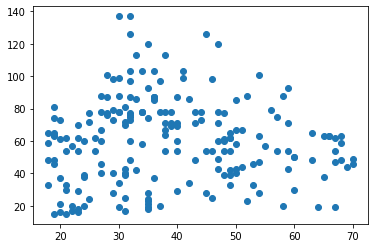

In [43]:
#bivariate analysis
plt.scatter ( dataset [ "Age" ] , dataset [ "AnnualIncome" ] )

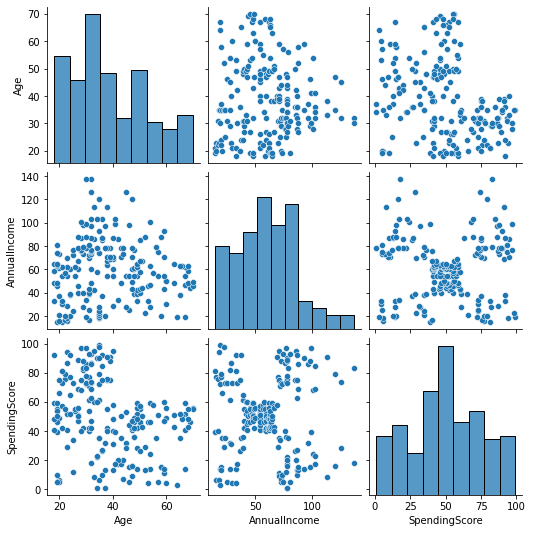

In [44]:
#multivariate analysis
sns.pairplot ( dataset )

In [45]:
#descriptive statistics on the dataset
dataset.describe ( )

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [46]:
#checking for missing values
dataset.isna ( ).sum ( )

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [47]:
#checking for outliers
for column in [ 'Age', 'AnnualIncome', 'SpendingScore']:
  q1 , q3 = np.percentile ( dataset [ column ] , [ 25 , 75 ] )
  iqr = q3 - q1
  lower_limit = q1 - iqr * 1.5
  upper_limit = q3 + iqr * 1.5
  filter = ( dataset [ column ] < lower_limit ) & ( dataset [ column ] > upper_limit ) 
  dataset [ column ] [ filter ] = ( q3 + q1 ) * 0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
#perform encoding for caterogical column, split data, scale independent data.
print ( dataset [ "Gender" ].value_counts ( ) )
dataset [ "Gender" ].replace ( { "Male": 0 , "Female": 1 } , inplace = True )
print ( dataset [ "Gender" ].value_counts ( ) )
scaler = MinMaxScaler ( )
scaler.fit ( dataset )
dataset = scaler.transform ( dataset )

Female    112
Male       88
Name: Gender, dtype: int64
1    112
0     88
Name: Gender, dtype: int64


In [49]:
#performing kmeans clustering algorithms
model = KMeans ( n_clusters = 4 , max_iter = 50 )
model.fit ( dataset )

KMeans(max_iter=50, n_clusters=4)

In [50]:
model.labels_

array([2, 2, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 2,
       3, 2, 3, 2, 3, 2, 3, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0,
       3, 0, 3, 0, 0, 0, 3, 2, 0, 1, 3, 1, 3, 1, 0, 1, 1, 2, 3, 3, 1, 2,
       3, 3, 2, 0, 1, 3, 3, 3, 1, 2, 3, 1, 0, 3, 1, 2, 1, 3, 0, 1, 3, 0,
       0, 3, 3, 2, 1, 3, 0, 2, 3, 0, 1, 2, 0, 3, 1, 2, 1, 0, 3, 1, 1, 1,
       1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 3, 2, 1, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 3, 0,
       1, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 0, 3, 0, 1, 0, 3, 0, 3, 2,
       1, 2], dtype=int32)

In [51]:
model.cluster_centers_

array([[1.00000000e+00, 2.00742240e-01, 3.66120219e-01, 6.80451128e-01],
       [4.44089210e-16, 6.04567308e-01, 3.88661202e-01, 2.87840136e-01],
       [1.11022302e-16, 1.97115385e-01, 3.85245902e-01, 7.21173469e-01],
       [1.00000000e+00, 5.79020979e-01, 3.59165425e-01, 3.44712430e-01]])